<a href="https://colab.research.google.com/github/aryansh007/MachineLearning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dateutil.parser as dparser
from sklearn.cluster import KMeans
 
def del_duplicates(df):
  df = df.drop_duplicates(keep='last', inplace=False)
  app_data_df['Last Updated'] = pd.to_datetime(app_data_df['Last Updated'])
  df = df.sort_values(by=['App',  'Last Updated'], ascending=False)
  df = df.drop_duplicates(subset='App', keep='first', inplace=False)
  return df
 
#read dataset
app_data_df = pd.read_csv('googleplaystore.csv')
 
#Drop the abnormal row
app_data_df.drop(app_data_df[app_data_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)
 
#Delete all duplicate apps
app_data_df = del_duplicates(app_data_df)
 
#Drop the meaningless attributes
app_data_df = app_data_df[['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating']]
 
#Drop the rows with missing values
for row in app_data_df[app_data_df.isnull().any(axis=1)].index:
  app_data_df = app_data_df.drop(row)
app_data_df = app_data_df.reset_index(drop=True)
 
display(app_data_df)

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
0,ENTERTAINMENT,4.7,11661,"1,000,000+",Free,0,Everyone
1,TOOLS,4.0,19,"10,000+",Free,0,Everyone
2,SOCIAL,4.6,22098,"1,000,000+",Free,0,Everyone
3,LIFESTYLE,3.8,718,"10,000+",Paid,$399.99,Everyone
4,COMICS,4.4,190,"10,000+",Free,0,Everyone
...,...,...,...,...,...,...,...
8190,NEWS_AND_MAGAZINES,4.4,27,100+,Free,0,Everyone
8191,COMMUNICATION,4.7,573,"10,000+",Free,0,Mature 17+
8192,TOOLS,4.5,259,"10,000+",Free,0,Everyone
8193,COMICS,3.5,115,"10,000+",Free,0,Mature 17+


In [ ]:
app_data_df['Installs'] = app_data_df.Installs.str.replace('+', '')
app_data_df['Installs'] = app_data_df.Installs.str.replace(',', '')
app_data_df['Price'] = app_data_df.Price.str.replace('$','')

In [ ]:
data_array = app_data_df.values

data_array[:, 1] = data_array[:, 1].astype(float) 
data_array[:, 2] = data_array[:, 2].astype(float)
data_array[:, 3] = data_array[:, 3].astype(float)
data_array[:, 5] = data_array[:, 5].astype(float)

In [ ]:
app_data_df = app_data_df[['Rating', 'Reviews', 'Installs', 'Price']]
app_data_df

,Rating,Reviews,Installs,Price
0,4.7,11661,1000000,0
1,4.0,19,10000,0
2,4.6,22098,1000000,0
3,3.8,718,10000,399.99
4,4.4,190,10000,0
...,...,...,...,...
8190,4.4,27,100,0
8191,4.7,573,10000,0
8192,4.5,259,10000,0
8193,3.5,115,10000,0


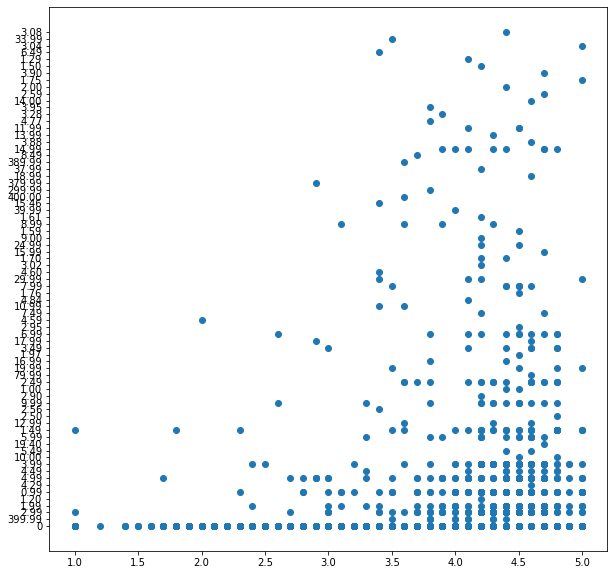

In [ ]:
plt.scatter(app_data_df['Rating'], app_data_df['Price'])
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

scaler.fit(app_data_df[['Rating']])
app_data_df['Rating'] = scaler.transform(app_data_df[['Rating']])

scaler.fit(app_data_df[['Price']])
app_data_df['Price'] = scaler.transform(app_data_df[['Price']]) 

scaler.fit(app_data_df[['Installs']])
app_data_df['Installs'] = scaler.transform(app_data_df[['Installs']]) 

scaler.fit(app_data_df[['Reviews']])
app_data_df['Reviews'] = scaler.transform(app_data_df[['Reviews']])

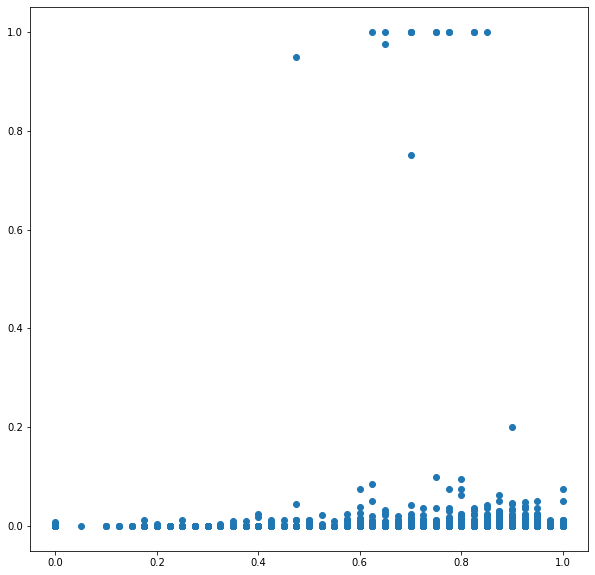

In [ ]:
plt.scatter(app_data_df['Rating'], app_data_df['Price'])
plt.rcParams['figure.figsize'] = (10,10)
plt.show()